In [21]:
import pandas as pd
import geopandas as gpd

In [22]:
relief_df = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/paperrelief.csv')

In [23]:
relief_gdf = gpd.GeoDataFrame(data=relief_df, geometry=gpd.points_from_xy(relief_df.East, relief_df.North))

zs = []
for idx, row in relief_gdf.iterrows():
    zs.append(row.Relief)

In [24]:
x=(relief_gdf.West.unique()+relief_gdf.East.unique())/2
y=(relief_gdf.North.unique()+relief_gdf.South.unique())/2

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show
src = rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/paperfig.tiff')
len(zs)/src.width
zs = np.asarray(zs)

X, Y = np.meshgrid(x, y)
zs = zs.reshape(X.shape)

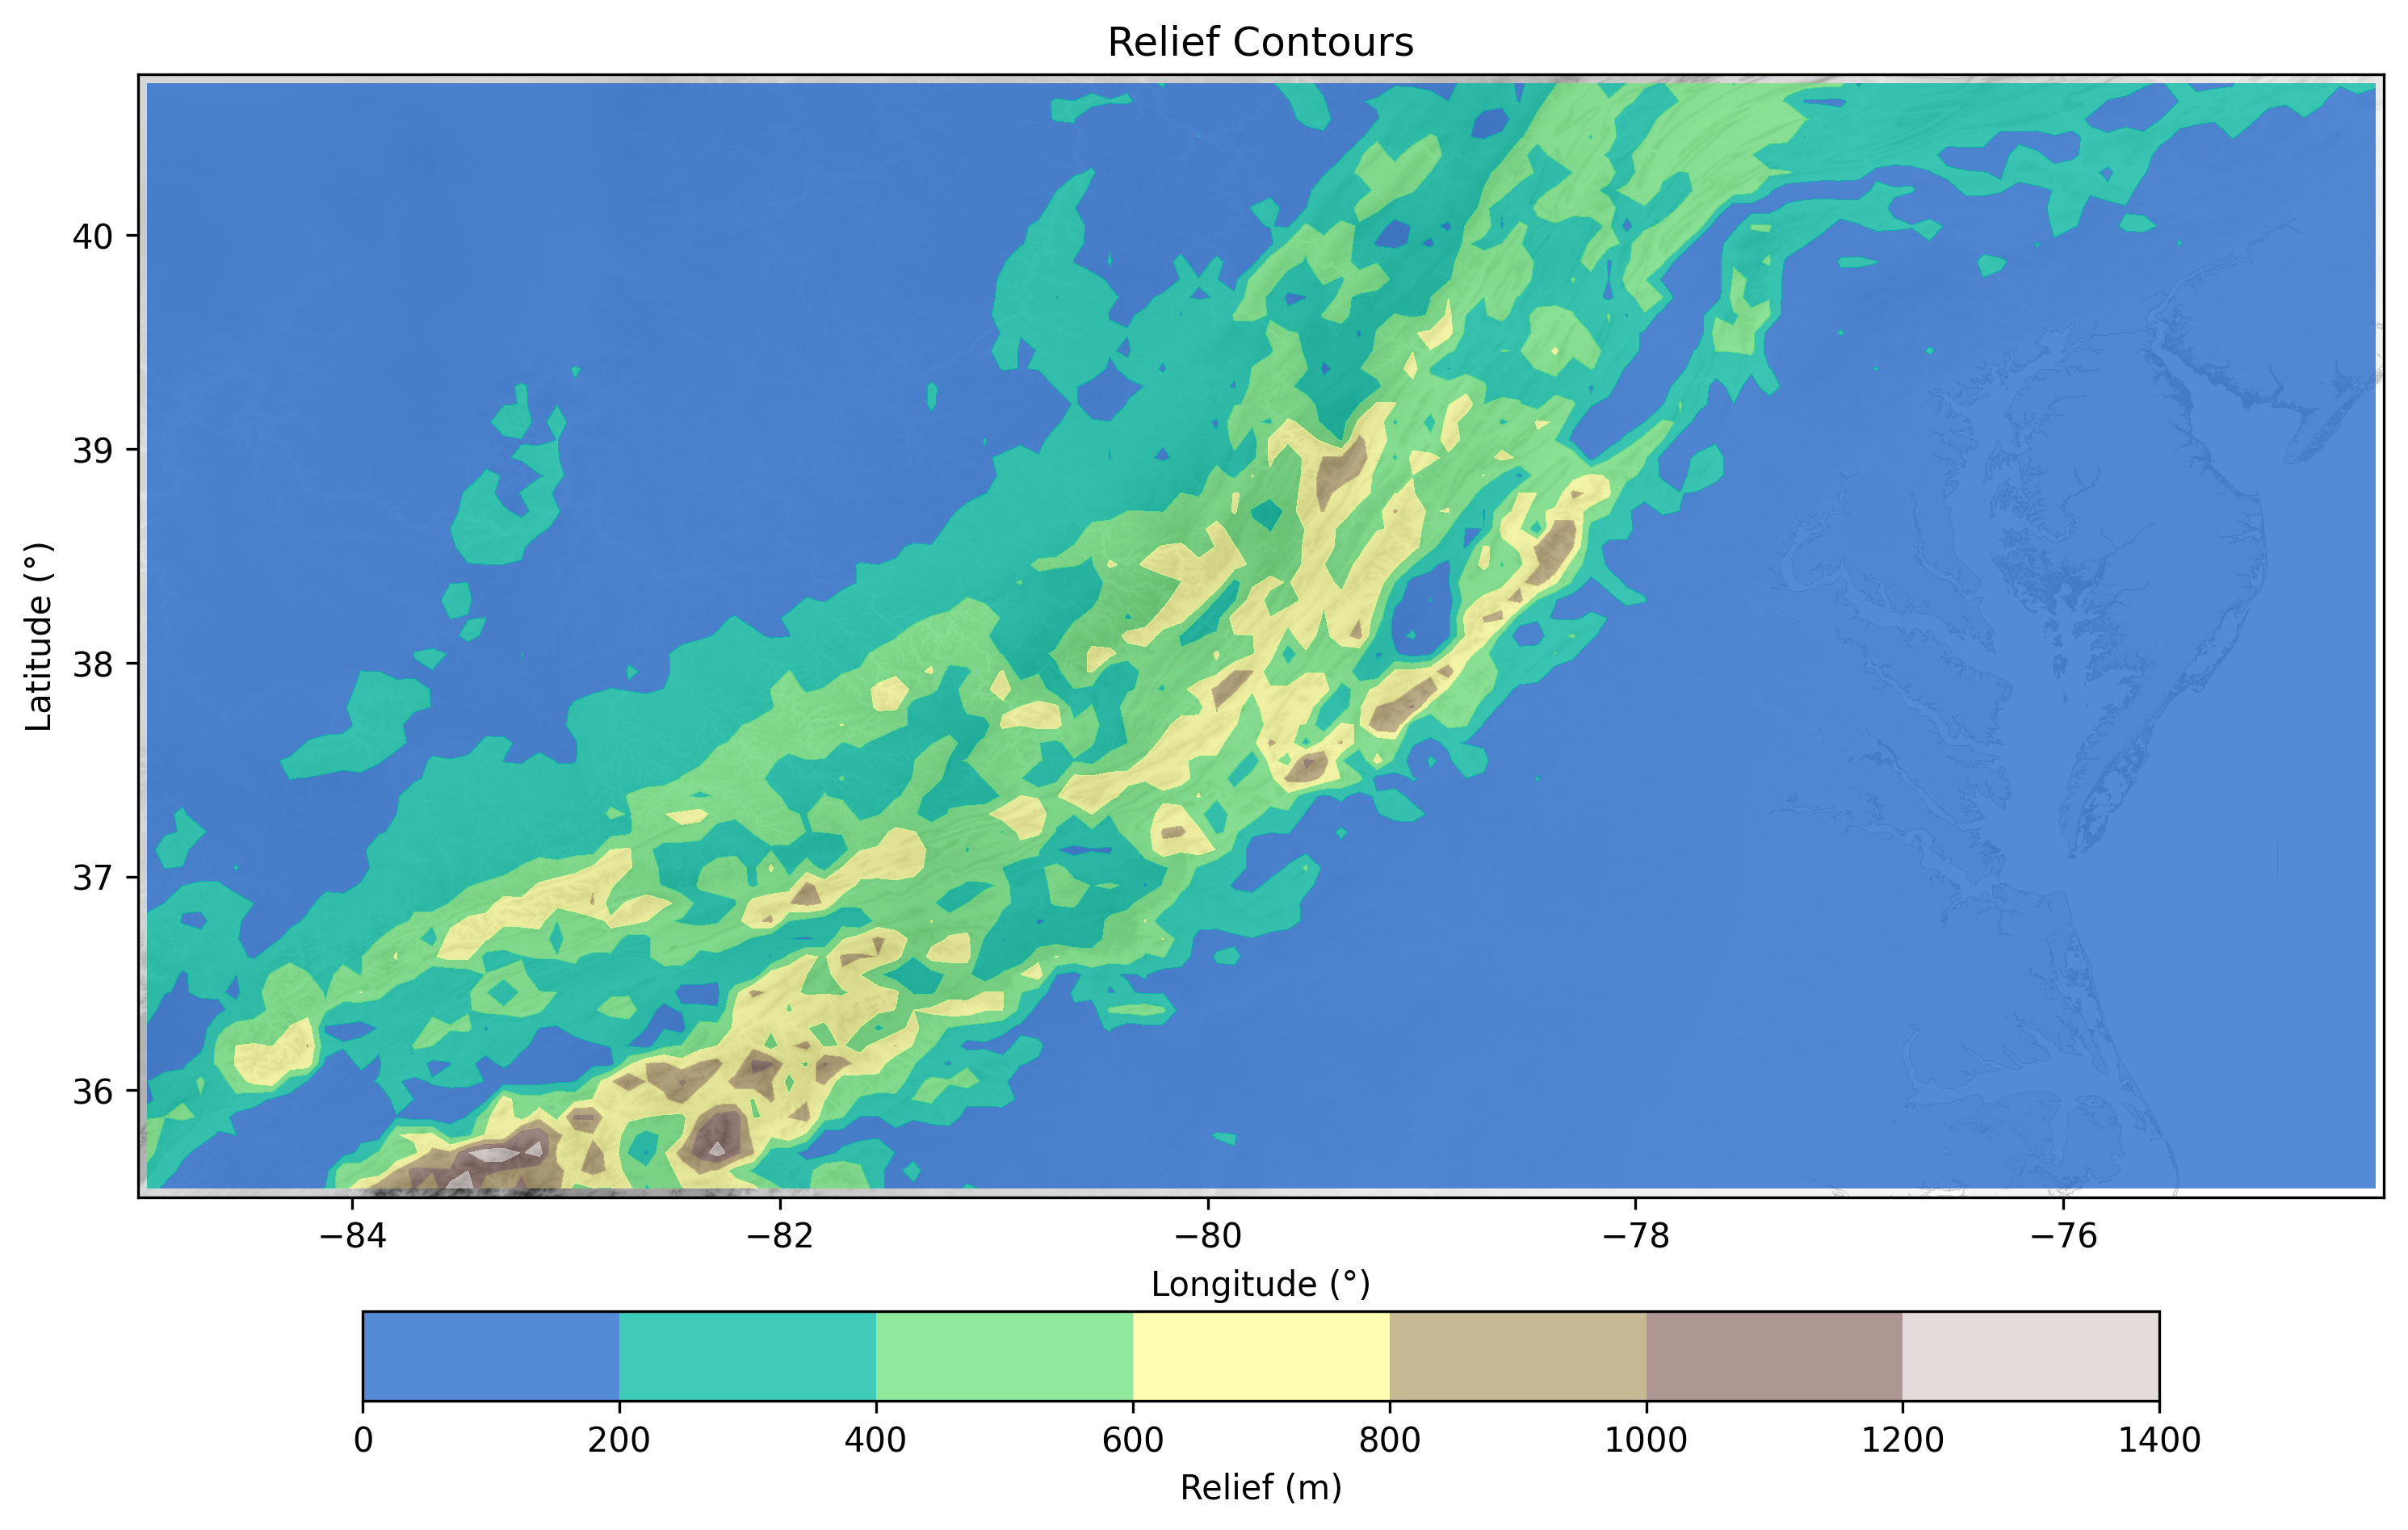

In [32]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
plt.tight_layout()

show(src, ax=ax, cmap='binary')
contours = ax.contourf(X,Y,zs, cmap='terrain', alpha=0.75)
ax.set_title('Relief Contours')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
cbar = fig.colorbar(contours, ax=ax, label="Relief (m)", shrink=0.8, location='bottom',pad=0.05)